# Name: Shreya Sadashiva Kamath
# Github Username: shreyasa31
# USC-ID: 7553148882

## **Project: Building a classifier to analyze the sentiment of reviews using MLP, CNN, RNN**

### **b) Data Exploration and Pre-processing**

*i) Binary Encoding where positive sentiment=1 and negative sentiment=-1*

In [23]:
# Paths to your data directories
positive_review_path = './Data/pos'
negative_review_path = './Data/neg'

In [36]:
import os
import numpy as np

def data_loading(dir, label):
    texts = []
    labels = []
    filenames = []  # List to hold filenames
    for f in os.listdir(dir):
        if f.endswith(".txt"):
            # Construct the full file path
            file_path = os.path.join(dir, f)
            # Open and read the file
            with open(file_path, 'r', encoding='utf-8') as fdata:
                texts.append(fdata.read())
            labels.append(label)
            filenames.append(f)  # Store the filename
    return texts, labels, filenames

# Specify the paths to your data directories
positive_review_path = './Data/pos'
negative_review_path = './Data/neg'

# Load all data
pos_texts, pos_labels, pos_filenames = data_loading(positive_review_path, 1)  # Positive sentiment
neg_texts, neg_labels, neg_filenames = data_loading(negative_review_path, -1)  # Negative sentiment

# Combine data
texts = pos_texts + neg_texts
labels = pos_labels + neg_labels
filenames = pos_filenames + neg_filenames  # Combine filenames

# Convert labels to a numpy array for use with Keras
labels = np.array(labels)


In [37]:
labels

array([ 1,  1,  1, ..., -1, -1, -1])

In [39]:
filenames

['cv000_29590.txt',
 'cv001_18431.txt',
 'cv002_15918.txt',
 'cv003_11664.txt',
 'cv004_11636.txt',
 'cv005_29443.txt',
 'cv006_15448.txt',
 'cv007_4968.txt',
 'cv008_29435.txt',
 'cv009_29592.txt',
 'cv010_29198.txt',
 'cv011_12166.txt',
 'cv012_29576.txt',
 'cv013_10159.txt',
 'cv014_13924.txt',
 'cv015_29439.txt',
 'cv016_4659.txt',
 'cv017_22464.txt',
 'cv018_20137.txt',
 'cv019_14482.txt',
 'cv020_8825.txt',
 'cv021_15838.txt',
 'cv022_12864.txt',
 'cv023_12672.txt',
 'cv024_6778.txt',
 'cv025_3108.txt',
 'cv026_29325.txt',
 'cv027_25219.txt',
 'cv028_26746.txt',
 'cv029_18643.txt',
 'cv030_21593.txt',
 'cv031_18452.txt',
 'cv032_22550.txt',
 'cv033_24444.txt',
 'cv034_29647.txt',
 'cv035_3954.txt',
 'cv036_16831.txt',
 'cv037_18510.txt',
 'cv038_9749.txt',
 'cv039_6170.txt',
 'cv040_8276.txt',
 'cv041_21113.txt',
 'cv042_10982.txt',
 'cv043_15013.txt',
 'cv044_16969.txt',
 'cv045_23923.txt',
 'cv046_10188.txt',
 'cv047_1754.txt',
 'cv048_16828.txt',
 'cv049_20471.txt',
 'cv050_11

*ii) Removing punctuations and numbers*

In [40]:
import re

def cleaning_text(texts):
    new_texts = []
    for t in texts:
        # Remove punctuation and numbers
        t = re.sub(r'[^\w\s]', '', t)  # Remove punctuation   
        t = re.sub(r'\d', '', t)  # Remove digits
        # Append the cleaned text
        new_texts.append(t)
    return new_texts

cleaned_texts = cleaning_text(texts)


In [41]:
cleaned_texts

['films adapted from comic books have had plenty of success  whether theyre about superheroes  batman  superman  spawn   or geared toward kids  casper  or the arthouse crowd  ghost world   but theres never really been a comic book like from hell before  \nfor starters  it was created by alan moore  and eddie campbell   who brought the medium to a whole new level in the mid s with a part series called the watchmen  \nto say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd  \nthe book  or  graphic novel   if you will  is over  pages long and includes nearly  more that consist of nothing but footnotes  \nin other words  dont dismiss this film because of its source  \nif you can get past the whole comic book thing  you might find another stumbling block in from hells directors  albert and allen hughes  \ngetting the hughes brothers to direct this seems almost as ludicrous as casting carrot top in  

*iii) Splitting test and train test in both positive and negative*

In [57]:
def splitting_data(cleanedtexts, labels, filenames):
    train_data, test_data = [], []
    train_labels, test_labels = [], []
    train_filenames, test_filenames = [], []

    for text, label, filename in zip(cleanedtexts, labels, filenames):
        num_part = int(filename[2:5])
        if 0 <= num_part <= 699:
            train_data.append(text)
            train_labels.append(label)
            train_filenames.append(filename)
        elif 700 <= num_part <= 999:
            test_data.append(text)
            test_labels.append(label)
            test_filenames.append(filename)

    return train_data, train_labels, train_filenames, test_data, test_labels, test_filenames


In [61]:
# Split the combined data based on filenames
train_data, train_labels, train_filenames, test_data, test_labels, test_filenames = split_based_on_filename(cleaned_texts, labels, filenames)


In [62]:
print("Number of files in the training set:", len(train_filenames))
print("Number of files in the testing set:", len(test_filenames))

Number of files in the training set: 1400
Number of files in the testing set: 600


*iv Counting number of Unique words*

In [64]:
from tensorflow.keras.preprocessing.text import Tokenizer


combined_data=train_data+test_data

# Create a tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(combined_data)

# Count the number of unique words
unique_word_count = len(tokenizer.word_index)

print("Number of unique words in both Train and Test dataset:", unique_word_count)


Number of unique words in both Train and Test dataset: 46737


*v) Average review length and the standard deviation of review length*

In [66]:
import numpy as np

# Calculate the length of each review
review_lengths = [len(review.split()) for review in combined_texts]

# Calculate the average length and standard deviation of the reviews
average_length = np.mean(review_lengths)
std_dev_length = np.std(review_lengths)

print("Average review length:", average_length)
print("Standard deviation of review lengths:", std_dev_length)


Average review length: 644.3575
Standard deviation of review lengths: 284.98012333099655


*vi) Plotting Histogram*

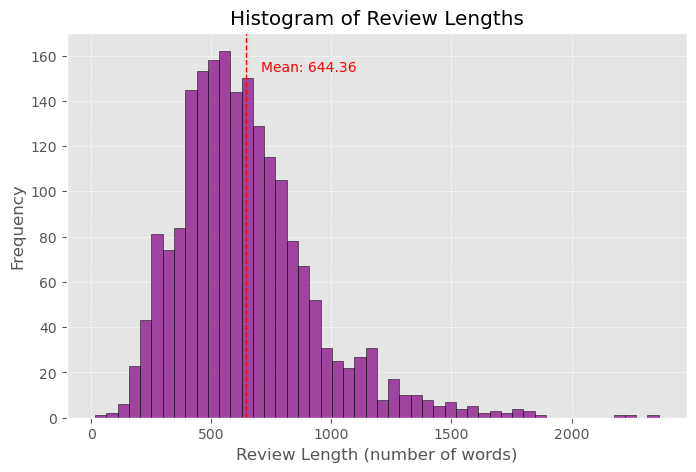

In [71]:
import matplotlib.pyplot as plt
review_lengths = [len(review.split()) for review in combined_texts]

# Set a style for the plot
plt.style.use('ggplot')  # Using 'ggplot' style for a cleaner and more modern look

# Plotting the histogram of review lengths with smaller dimensions
plt.figure(figsize=(8, 5))  # Adjusted to smaller size
plt.hist(review_lengths, bins=50, color='purple', edgecolor='black', alpha=0.7)
plt.title('Histogram of Review Lengths')
plt.xlabel('Review Length (number of words)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', linewidth=0.5)  # Adjust grid visibility and style
plt.axvline(x=np.mean(review_lengths), color='red', linestyle='dashed', linewidth=1)  # Mean line
plt.text(np.mean(review_lengths) * 1.1, plt.ylim()[1] * 0.9, 'Mean: {:.2f}'.format(np.mean(review_lengths)),
         color='red')  # Add text for mean value

plt.show()